# Question: Gram-Schmidt Algorithm & QR Decomposition

**i.** Write a code to generate a random matrix A of size $m × n$ with $m > n$ and calculate its Frobenius norm, $|| \cdot ||_F$. The entries of A must be of the form r.dddd (example 5.4316). The inputs are the positive integers m and n and the output should display the the dimensions and the calculated norm value.



> **Deliverable(s) : The code with the desired input and output (0.5)**

In [1]:
from typing import List, Tuple
import random, math
import copy

def generate_random_entry() -> float:
    """[Returns a random number of the form r.dddd]

    Returns:
        float: A random number
    """

    digits = ""
    for i in range(5):
        dig = random.randint(0, 9)
        if i == 4: dig = random.randint(1, 9)
        digits = digits + str(dig)
        if i == 0: digits += "."
    return float(digits)

def create_random_matrix(m:int, n:int, wide:bool = False) -> List:
    """[Takes in the number of rows and columns and generates a matrix of size m x n]

    Args:
        m (int): Number of rows of the matrix
        n (int): Number of columns of the matrix
        wide (bool, default = False): Whether wider or square matrix are allowed

    Returns:
        List: A matrix as a list of lists
    """
    if not wide:
        if m <= n:
            raise AssertionError("Requested matrix is square or wide; It must be tall. Please give m > n")
    
    A = []
    for i in range(m):
        ith_row = []
        for j in range(n):
            ith_row.append(generate_random_entry())
        A.append(ith_row)
    
    return A

def frob_norm(A: List) -> float:
    """[Takes in a matrix A and computes the frobenius norm of that matrix]

    Args:
        A (List): A matrix represented as List of Lists

    Returns:
        float: The frobenius norm of the matrix
    """
    
    if len(A) == 0:
        raise AssertionError("Empty matrix passed. Pass a finite matrix")

    fro_norm = 0.0

    for row in A:
        for element in row:
            fro_norm += element * element
    
    fro_norm = math.sqrt(fro_norm)
    return fro_norm

In [2]:
def display_matrix(A):
    """
    Given a matrix as a list of lists, just prints them out neatly with row and column numbers
    """
    nr = len(A)
    nc = len(A[0])
    matrix_string = "        "
    for col in range(nc):
        matrix_string += f"C{col+1:<7}"
    matrix_string += "\nR1   "
    for idx, r in enumerate(A):
        for element in r:
            matrix_string += f"{element: .4f} "
        if idx < nr - 1:
            matrix_string += f"\nR{idx + 2:<3} "
    print(matrix_string)

In [3]:
def rreduce(A:List, threshold:float = 1e-6) -> Tuple:
    """[Given a matrix A as a list of lists, compute it's row reduced echelon form.
    Return that along with the rank of the matrix]

    Args:
        A (List): A m x n tall matrix
        threshold (float, optional): When comparing the pivot elements, what magnitude of a value counts as zero magnitufe. Defaults to 1e-6.

    Returns:
        Tuple: A tuple of row reduced echelon form and the decision i.e. whether
        the matrix has linearly independent columns or not
    """
    # Create a copy of the original matrix
    A = copy.deepcopy(A)
            
    # Find out number of rows and columns
    nr, nc = len(A), len(A[0])            
    
    # Get Echelon form using row reduction (Only iterate for as many times as columns since tall matrix can't have more pivot elements than number of columns)
    for i in range(nc - 1):
        
        pivot_element = A[i][i]
        # TODO: Handle pivot = zero
        
        # Make all the elements below the pivot to be zero
        # in an iterative manner
        for j in range(i + 1, nr):
                        
            div_factor = A[j][i] / pivot_element     
            
            transformed_row = []
            for idx, element in enumerate(A[j]):
                transformed_element = element - div_factor * A[i][idx]
                if idx == i: transformed_element = 0.0
                transformed_row.append(transformed_element)
            
            A[j] = transformed_row
    
    # Check the leading diagonal entries;
    # If a few of them are zeros or near zeros,
    # then given matrix is not a full rank matrix
    full_rank = True
    for i in range(nc):
        if abs(A[i][i]) <= threshold:
            full_rank = False
            break
                    
    return (A, full_rank)

In [4]:
# Create a random tall matrix
A = create_random_matrix(5,4)
display_matrix(A)

        C1      C2      C3      C4      
R1    3.0446  4.5245  9.3336  7.4312 
R2    4.3088  2.6332  3.1957  1.7429 
R3    9.4948  2.3089  7.9681  8.1817 
R4    0.7217  1.0528  3.8706  7.7158 
R5    3.6665  1.7198  7.9819  1.6907 


In [5]:
# Row reduce the matrix into it's REF and see if it's columns are linearly independent
m, dec = rreduce(A)
display_matrix(m), dec

        C1      C2      C3      C4      
R1    3.0446  4.5245  9.3336  7.4312 
R2    0.0000 -3.7700 -10.0135 -8.7739 
R3    0.0000  0.0000  10.2054  12.4717 
R4    0.0000  0.0000  0.0000  3.9098 
R5    0.0000  0.0000  0.0000 -6.7021 


(None, True)

In [6]:
# Purposely generate a matrix where rows are linearly dependent
# And check if the REF is accurate or not
r1 = [generate_random_entry() for i in range(3)]
r2 = [generate_random_entry() for i in range(3)]
r3 = [0.1*(x + y) for x, y  in zip(r1, r2)]
r4 = [(x - y)/2 for x, y in zip(r2, r3)]
A = [r1,r2,r3,r4]

In [7]:
display_matrix(A)

        C1      C2      C3      
R1    1.2951  2.0831  2.4486 
R2    0.1184  9.4195  5.0054 
R3    0.1414  1.1503  0.7454 
R4   -0.0115  4.1346  2.1300 


In [8]:
m, dec = rreduce(A)
display_matrix(m), dec

        C1      C2      C3      
R1    1.2951  2.0831  2.4486 
R2    0.0000  9.2291  4.7815 
R3    0.0000  0.0000  0.0000 
R4    0.0000  0.0000 -0.0000 


(None, False)

$$
\pagebreak
$$

# Question: Gradient Descent Algorithm

**i**: Consider the last 4 digits of your mobile number (Note : In case there is a 0 in one of the digits replace it by 3). Let it be $n_1n_2n_3n_4$. Generate a random matrix A of size $n_1n_2 \times n_3n_4$. For example, if the last four digits are 2311, generate a random matrix of size 23 × 11. Write a code to calculate the $l_{\infty}$ norm of this matrix.

> **Deliverable(s) : The code that generates the results. (0.5)**

In [9]:
def generate_gradient_descent_matrix() -> Tuple:
    """[Creates a matrix of the size n1n2 * n3n4]

    Returns:
        List: A matrix in the form of a list
    """

    # Prompt the user for his mobile number

    # Ascertain the mobile number is valid
    number = input("Enter your phone number:\n")
    try:
        n = int(number)
        if len(number.strip()) > 10:
            raise AssertionError("Mobile number cannot have more than 10 digits")
    except Exception as e:
        print("{str(e)}\nEntered number invalid. Please enter a valid number")
    
    # Get the last 4 digits of the number and replace
    # 0s in the number with 3s
    rc = number.strip()[-4:]
    rc = rc.replace("0", "3")

    nr, nc = int(rc[:2]), int(rc[2:])
    matrix = create_random_matrix(nr, nc, wide = True)
    b = create_random_matrix(nr, 1, wide = True)
    
    return (matrix, b)

def linf_norm(matrix: List) -> float:
    """[Given a matrix computes it's linfinity norm]

    Args:
        matrix (List): [Matrix represented as a list of numbers]

    Returns:
        float: The infinity norm of the said matrix
    """
    
    inf_norm = 0

    # For each row in the matrix
    for row in matrix:
        rsum = 0

        # Compute the row sum of absolute vals of elements in that row
        for element in row:
            rsum += abs(element)

        # Store the largest row sum
        if rsum > inf_norm:
            inf_norm = rsum
    return inf_norm

In [10]:
A, b = generate_gradient_descent_matrix()
# display_matrix(g)
print(f"L-inf norm of the generated matrix is {linf_norm(A):.5f}")

Enter your phone number:
 7738368566


L-inf norm of the generated matrix is 395.25300


$$
\pagebreak
$$

**ii** Generate a random vector b of size $n_1n_2 \times 1$ and consider the function $f(x) = \frac{1}{2}||Ax - b||_2^2$ where $|| \cdot ||_2$ is the vector $l_2$ norm. Its gradient is given to be $\nabla f(x) = A^TAx - A^Tb$. Write a code to find the local minima of this function by using the gradient descent algorithm (by using the gradient expression given to you). The step size $\tau$ in the iteration $x_k + 1 = x_k − \tau \nabla f(x_k)$ should be chosen by the formula 

$$
\tau = \frac{g_k^Tg_k}{g_k^TA^TAg_k}
$$

where $g_k = \nabla f(x_k) = A^TAx_k - A^Tb$ The algorithm should execute
until $||x_k - x_{k - 1}||_2 < 10^{-4}$.

> **Deliverable(s) : The code that finds the minimum of the given function and the expression for $\tau$. The values of $x_k$ and $f(x_k)$ should be stored in a file.**

In [11]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)
np.set_printoptions(precision=3)

def gradient_descent() -> List:
    """[Generates a random matrix based on user's mobile number, performs gradient descent and returns the solutions of the system of equation and intermediate steps taken]

    Returns:
        List: [A list of solutions, intermediate values and function values at each step]
    """
    A, b = generate_gradient_descent_matrix()
    A = np.array(A)
    b = np.array(b)
    
    # Start with an initial guess of all zeros
    current_solution = np.zeros((A.shape[1], 1))
    optimization_steps = []
    
    # Begin optimization here
    while True:
        
        # Find out the function value
        f = np.matmul(A, current_solution) - b
        func_val = 0.5 * (frob_norm(f.tolist()) ** 2)

        # Find the gradient of the function at the current step 
        AtA = np.matmul(A.transpose(), A)
        AtAx = np.matmul(AtA, current_solution)
        Atb = np.matmul(A.transpose(), b)
        gradf = AtAx - Atb

        # Compute the learning rate
        tau_nr = np.matmul(gradf.transpose(), gradf).flatten().item()
        tau_dr = np.matmul(gradf.transpose(), np.matmul(AtA, gradf)).flatten().item()
        
        # Take a step in the opposite direction of the gradient
        previous_solution = current_solution
        current_solution = previous_solution - (tau_nr / tau_dr) * gradf

        # Define the stopping criterion
        stopping_threshold = frob_norm((current_solution - previous_solution).tolist())
        if abs(stopping_threshold) <= 1e-4:
            break

        optimization_steps.append([np.around(previous_solution, 3), np.around(gradf, 3), func_val])
    
    return optimization_steps

In [12]:
solutions = gradient_descent()
df = pd.DataFrame(solutions, columns = ["Point", "Gradient", "FunctionValue"])

# Save the obtained solutions to a file
df.to_csv("solutions.csv", index = None);

Enter your phone number:
 7738368566


$$
\pagebreak
$$

**iii** Generate the graph of $f(x_k)$ vs $k$ where $k$ is the iteration number and $x_k$ is the current estimate of $x$ at iteration $k$. This graph should convey the decreasing nature of function values.

> **Deliverable(s) : The graph that is generated.**

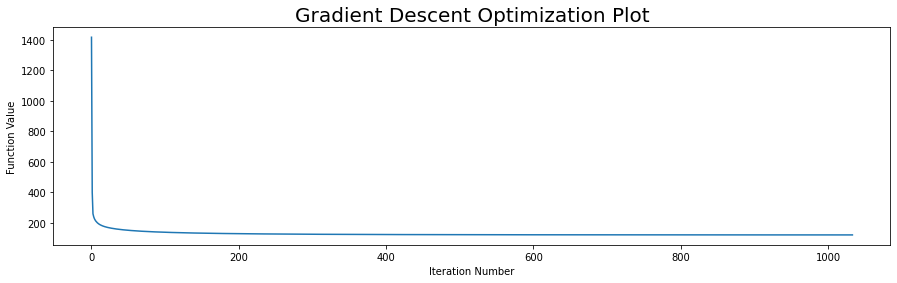

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (15,4))

plt.plot(df.index.tolist(), df.FunctionValue, )
plt.xlabel("Iteration Number")
plt.ylabel("Function Value")
plt.title("Gradient Descent Optimization Plot", fontsize = 20);
plt.ylim();

# Critical points of polynomial function

**i** Generate a third degree polynomial in $x$ and $y$ named $g(x,y)$ that is based on your mobile number (Note : In case there is a 0 in one of the
digits replace it by 3). Suppose your mobile number is $9412821233$, then the polynomial would be 

$$ 
g(x,y) = 9x^3 - 4x^2y + 1xy^2 -2y^3 +8x^2 -2xy + 1y^2 -2x + 3y -3
$$

where alternate positive and negative sign are used. 

> **Deliverable(s) : The polynomial constructed should be reported. (0.5)**

In [14]:
def generate_polynomial() -> List:
    """Prompts the user for input and generates a polynomial based on the mobile number generated by the user. 
    Assumption: Mobile numbers can only be 10 digits long 

    Returns:
        List: Co-efficient list for the polynomial
    """
    number = input("Enter your cell number:\n")

    # Validate the entered input
    try:
        _ = int(number.strip())
    except Exception as e:
        print(f"Incorrect input format. Please enter a number!")
        return []

    if len(number.strip()) != 10:
        print("Please enter a valid number. Mobile number must be 10 digits long!")  
        return []
    
    polynomial_coefs = []
    for idx, chr in enumerate(number):
        coef = int(chr)
        # In case there's a zero in the mobile number replace it with a 3
        if coef == 0: coef = 3
        # Alternate + and - in coefficients
        if idx % 2 == 1:
            coef = -1 * coef
        polynomial_coefs.append(coef)
    
    return polynomial_coefs

def display_polynomial(coefs: List):
    """[Given a list of co-efficients, displays a polynomial]

    Args:
        coefs (List): A coe-efficient polynomial
    """
    terms = ["x^3", "x^2y", "xy^2", "y^3", "x^2", "xy", "y^2", "x", "y", "1"]
    
    polynomial = ""
    for idx, (coef, term) in enumerate(zip(coefs, terms)):
        if idx % 2 == 0:
            polynomial += f"+{coef}{term}"
        else:
            polynomial += f"{coef}{term}"
    polynomial = polynomial[:-1]
    
    # Print if there is a polynomial generated for reporting
    if polynomial:
        print(f"\nPolynomial corresponding to your phone number\n{polynomial}")

$$
\pagebreak
$$

In [22]:
# Generate a polynomial with invalid input
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 adaw123


Incorrect input format. Please enter a number!


In [16]:
# Generate a polynomial with fewer/more than 10 digits
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 77358


Please enter a valid number. Mobile number must be 10 digits long!


In [17]:
# Generate a plynomial with valid input
poly = generate_polynomial()
display_polynomial(poly)

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6


$$
\pagebreak
$$

**ii** Write a code to find all critical points of $g(x, y)$. You may use built in functions like `solve` (or other similar functions) in Octave/Matlab to find the critical points. 

> **Deliverable(s) : The code that finds the critical points along with the display of all the calculated critical points. (1)**

![](32_critical_points.jpeg)

In [18]:
from scipy.optimize import fsolve

import warnings, random
warnings.filterwarnings("error")

def find_critical_points(polynomial: List) -> List:
    """[Accepts a polynomial of 3rd degree in x and y and finds out the critical points of the same in an iterative manner]

    Args:
        polynomial (List): Co-efs of 3rd degree polynomial as a list

    Returns:
        List: A dataframe of solutions
    """
    g = polynomial
    
    # Define the system of simultaneous equations for scipy to solve
    def equations(p):
        x, y = p

        gx = (3*g[0])*(x**2) + (2*g[1])*(x*y) + (g[2])*(y**2) + (2*g[4])*(x) + (g[5])*(y) + (g[7])
        gy = (g[1])*(x**2) + (2*g[2])*(x*y) + (3*g[3])*(y**2) + (g[5])*(x) + (g[6])*(y) + (g[8])

        return (gx, gy)

    solutions = []
    counter = 0

    # Select a random starting point in the R2 landscape and iterate for 1000 
    # times in this landscape to find roots of the equation
    while counter < 1000:
        initial_x, initial_y = random.randint(-10000, 10000), random.randint(-10000, 10000)
        try:
            # Try to solve the equations
            x, y =  fsolve(equations, (initial_x, initial_y))
            counter += 1

            # Rounding in order to avoid solutions which differ by a very thin margin
            # i.e. in the 8th or 9th decimal place
            sol = (round(x,7),round(y,7))
            
            # If the solution has not been encountered, then add it to the set of
            # solutions container defined above
            if not (sol in solutions):
                solutions.append(sol)
                
        except RuntimeWarning:
            # This is to suppress the solutions which do not converge and simply 
            # raise a warning that the solution didn't converge
            pass
    
    return solutions

In [19]:
# Find the critical points of a random polynomial
g = generate_polynomial()
solutions = find_critical_points(g)

# Show the critical points
display_polynomial(g)
for idx, point in enumerate(solutions):
    print(f"CP{idx:2d}: (x ={point[0]: .5f}, y ={point[1]: .5f})")

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6
CP 0: (x =-0.53201, y = 0.65738)
CP 1: (x = 0.21693, y =-0.27483)
CP 2: (x = 0.59938, y = 0.47341)
CP 3: (x =-0.70123, y =-0.45777)


$$
\pagebreak
$$

**iii** Write a code to determine whether they correspond to a maximum, minimum or a saddle point.


> **Deliverable(s) : The code that identifies the type of critical points. The critical points and their type must be presented in the form of the table
generated by code for the above polynomial.**

![](33_hessian.jpeg)

In [20]:
def determine_nature(polynomial: List, critical_point: Tuple, threshold: float = 1e-6) -> str:
    """[Given a polynomial and an identified critical point for the polynomial,
    computes if the point is a maxima, minima or saddle point]

    Args:
        polynomial (List): Co-efficients of the polynomial
        critical_point (Tuple): A critical point in R2
        threshold (float, default: 1e-6): A zero threshold (i.e. whether the eigen value found is zero or not) 

    Returns:
        str: Type of the point
    """
    g = polynomial
    cx, cy = critical_point

    # Compute hessian matrix values
    h11 = 6*g[0]*cx + 2*g[1]*cy + 2*g[4]
    h12 = 2*g[1]*cx + 2*g[2]*cy + g[5]
    h21 = h12
    h22 = 2*g[2]*cx + 6*g[3]*cy + 2*g[6]

    # Find the determinant of this hessian matrix
    D = h11 * h22 - h12 * h21
       
    # Check the signs of eigen values
    if abs(D) < threshold:
        return "inconclusive"
    elif D < 0:
        return "saddle"
    elif ((D > 0) and (h11 > 0)):
        return "minima"
    elif ((D > 0) and (h11 < 0)):
        return "maxima"

In [21]:
# Find the critical points of a random polynomial
g = generate_polynomial()
solutions = find_critical_points(g)

# Show the Polynomial
display_polynomial(g)
print()

# Determine the nature of the critical points and print the same
for idx, point in enumerate(solutions):
    nature = determine_nature(g, point)
    print(f"CP{idx:2d}: (x ={point[0]: .5f}, y ={point[1]: .5f}) | Nature: {nature}")

Enter your cell number:
 7738368566



Polynomial corresponding to your phone number
+7x^3-7x^2y+3xy^2-8y^3+3x^2-6xy+8y^2-5x+6y-6

CP 0: (x =-0.70123, y =-0.45777) | Nature: saddle
CP 1: (x = 0.21693, y =-0.27483) | Nature: minima
CP 2: (x = 0.59938, y = 0.47341) | Nature: saddle
CP 3: (x =-0.53201, y = 0.65738) | Nature: maxima
